In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def logistic(t, a, b, c):
    return a/(1 + np.exp(b*(t - c)))

In [37]:
rescaling = pd.read_csv('C:/Users/kipr/Downloads/téléchargement.csv')
predictions = pd.read_csv('predictions.csv')
predictions['start_date'] = pd.to_datetime(predictions['start_date'])
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
data['dateRep'] = pd.to_datetime(data['dateRep'], dayfirst=True)

In [9]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
10532,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10533,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
10534,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10535,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


299 235


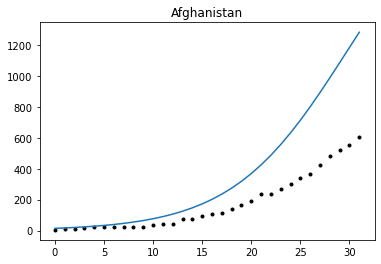

1554 1133


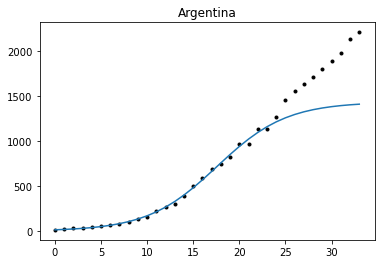

5744 5224


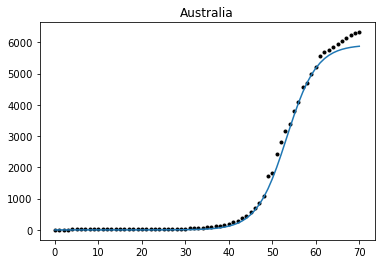

19691 15348


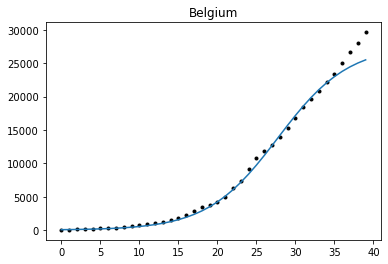

183 132


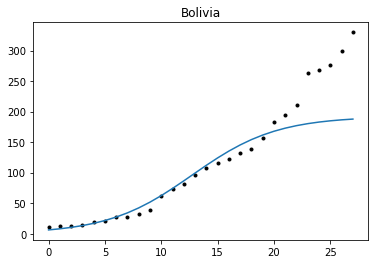

11130 7910


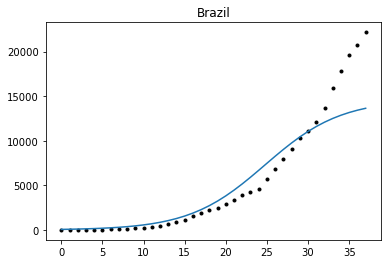

345 288


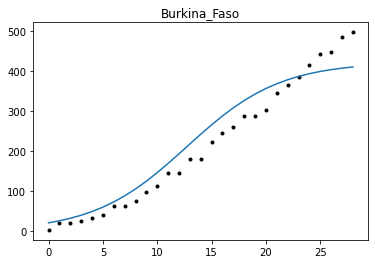

114 114


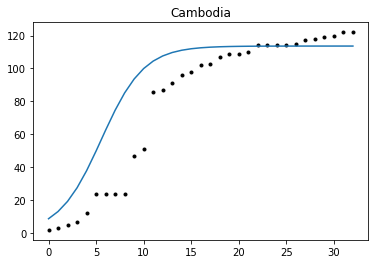

15496 11268


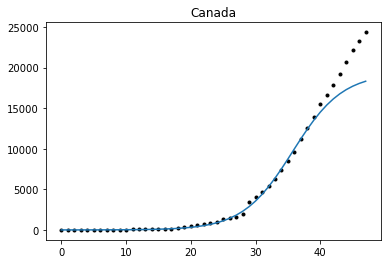

4471 3404


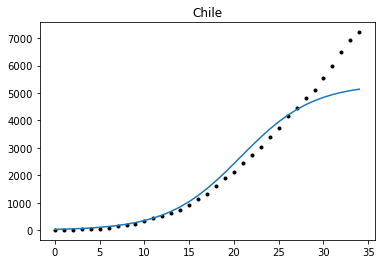

82642 82465


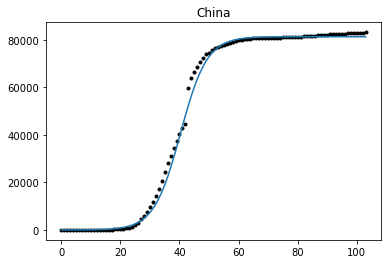

1485 1161


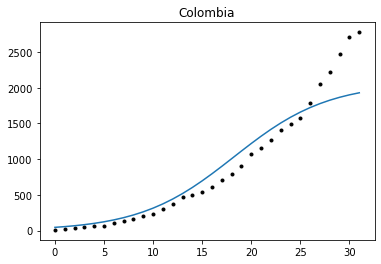

261 194


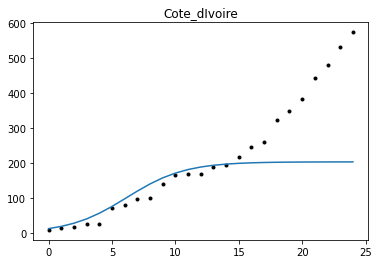

320 233


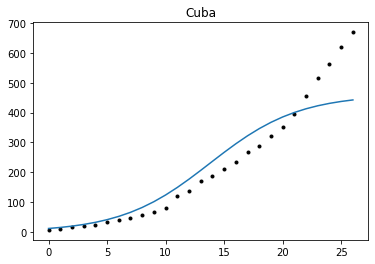

154 123


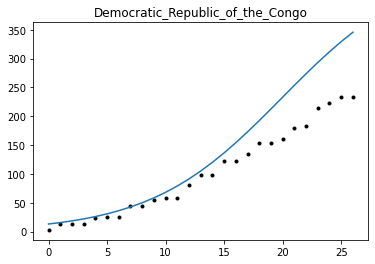

1745 1380


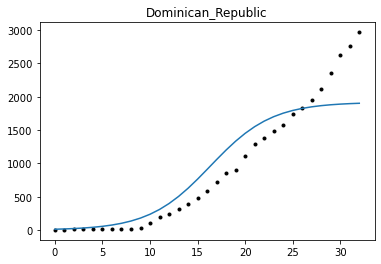

3646 3163


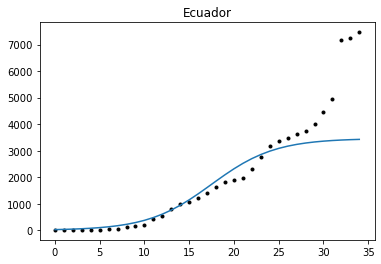

1070 779


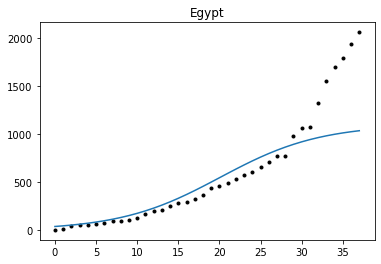

70478 59105


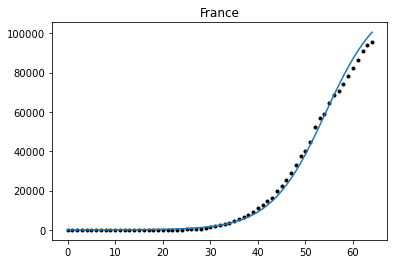

95391 79696


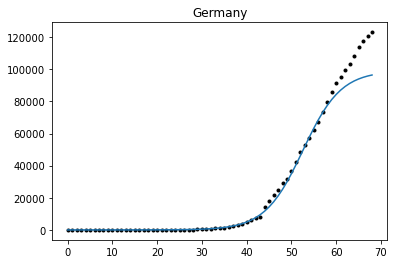

214 204


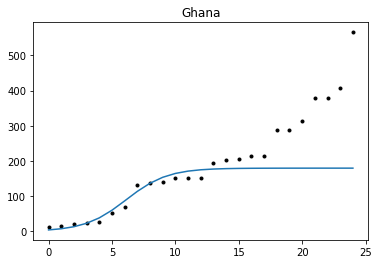

1735 1514


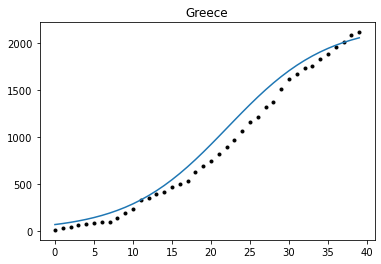

2273 1790


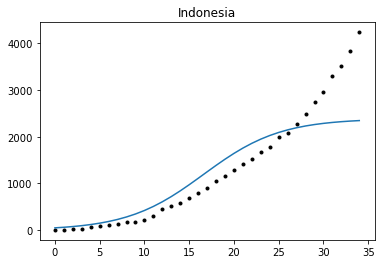

58226 50468


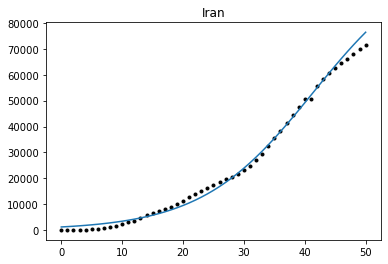

961 772


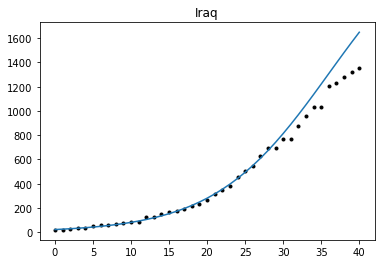

128948 115242


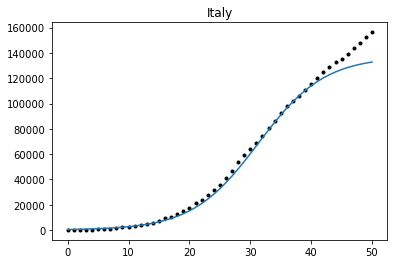

3654 2617


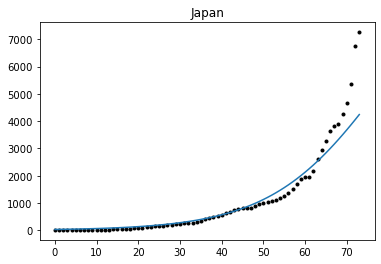

531 386


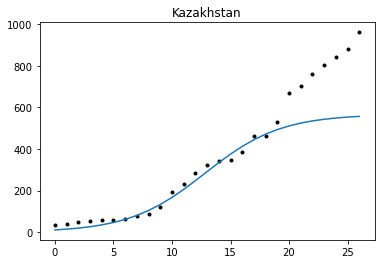

3662 3116


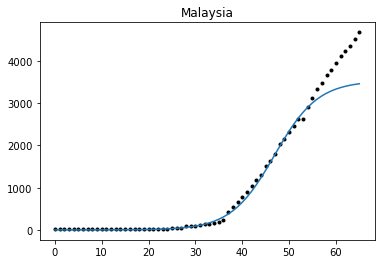

2143 1510


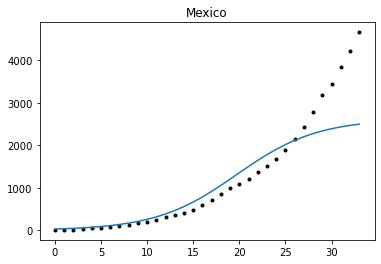

1021 708


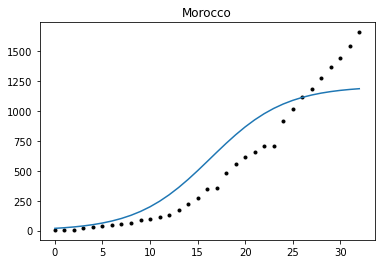

16627 14697


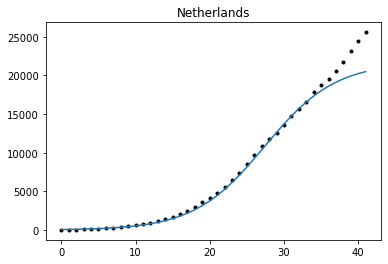

232 174


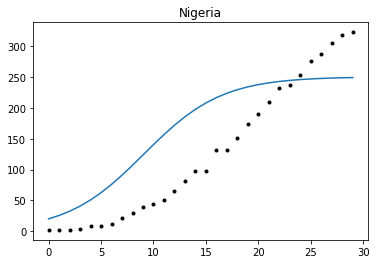

3277 2291


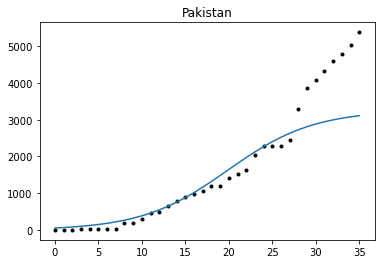

2281 1414


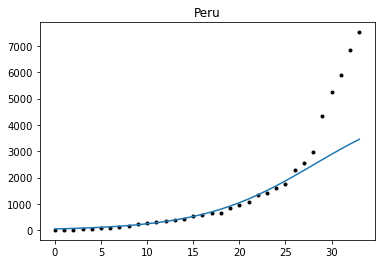

3246 2633


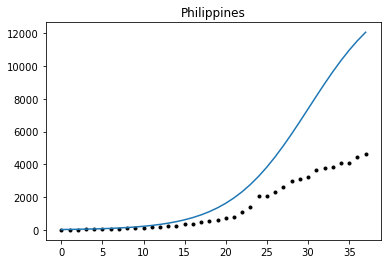

4102 2946


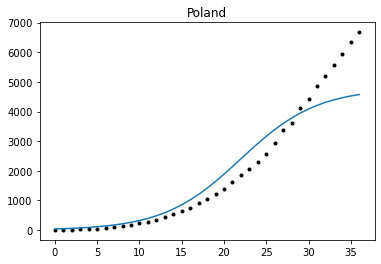

11278 9034


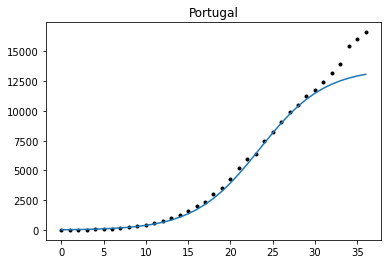

3864 2738


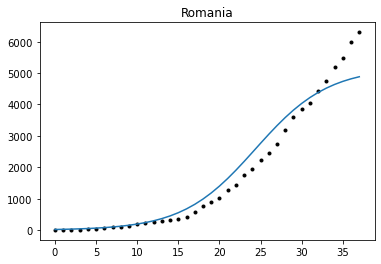

5389 3548


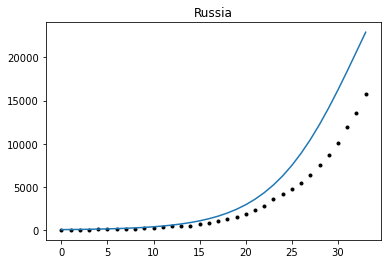

2385 1885


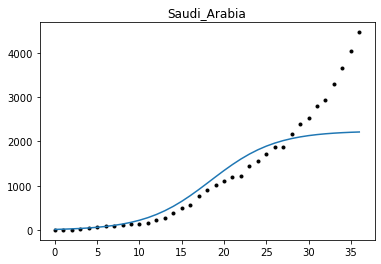

222 195


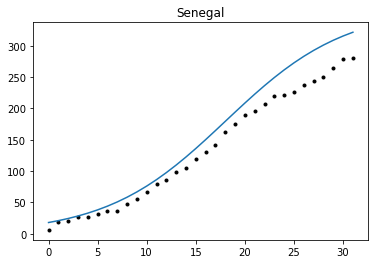

1655 1462


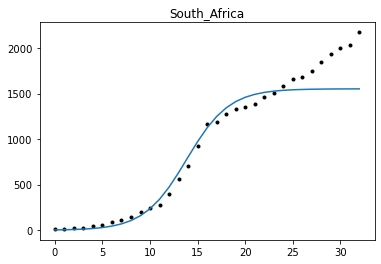

10284 10062


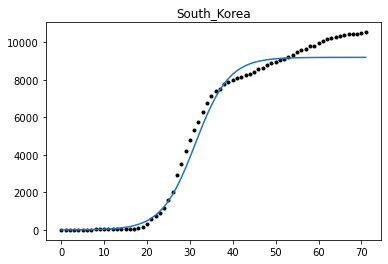

130759 110238


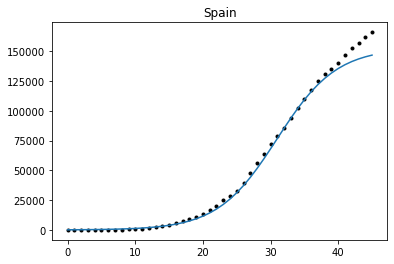

166 148


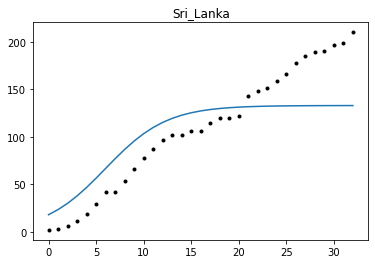

6830 5466


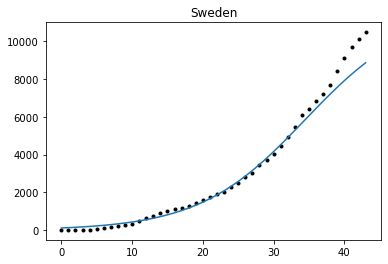

363 339


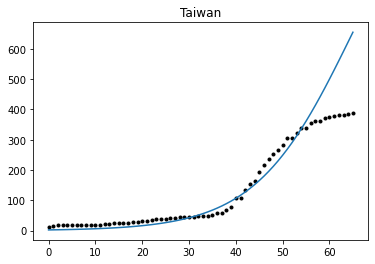

2220 1875


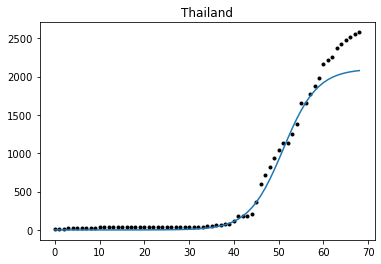

553 455


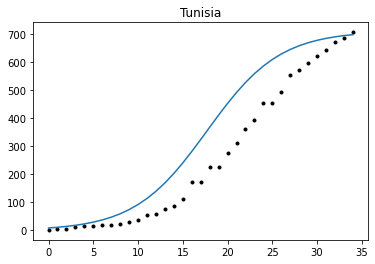

27069 18135


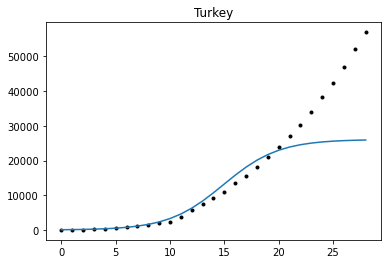

1251 804


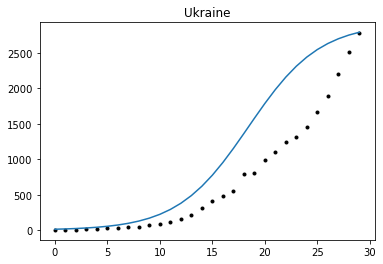

47806 33718


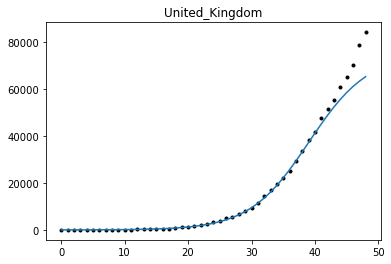

337635 245540


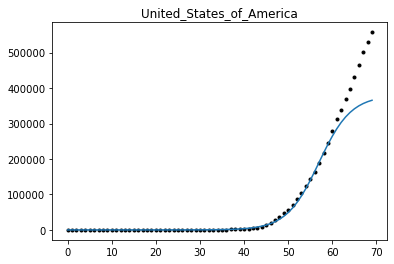

342 190


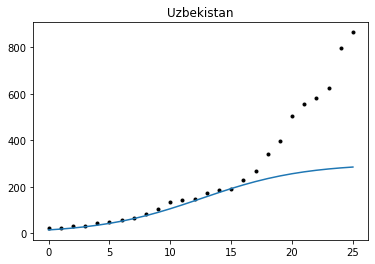

148 144


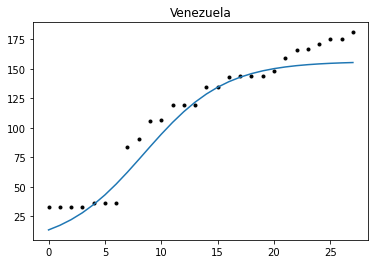

241 239


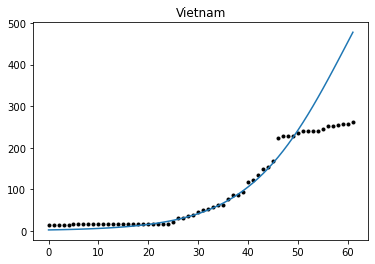

In [53]:
for i, (country, start_date, _, a, b, c) in predictions.iterrows():
    values = data[data['countriesAndTerritories'] == country][['cases', 'dateRep']]
    values.sort_values('dateRep', inplace=True)
    rescale1 = rescaling[rescaling['countriesAndTerritories'] == country]['cases'].sum()
    values['cases'] = np.cumsum(values['cases'])
    values = values[values['dateRep'] > start_date]
    try:
        rescale = values[values['dateRep'] == pd.to_datetime('04-03-2020')]['cases'].values[0]
        print(rescale1, rescale)
        t = np.arange(len(values.index))
        plt.plot(t, values['cases'].values, 'k.')
        plt.plot(t, logistic(t, a, b, c)*rescale)
        plt.title(country)
        plt.show()
    except:
        pass
